# Logistic Model ON Fashion-MINIST

In [1]:
import utils.mnist_reader as mnist_reader
import numpy as np
import pandas as pd
import math
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.datasets import fetch_openml
from sklearn.neighbors import KNeighborsClassifier, NearestCentroid
from sklearn.metrics import accuracy_score, confusion_matrix, ConfusionMatrixDisplay, classification_report
from sklearn.model_selection import train_test_split
from sklearn.inspection import DecisionBoundaryDisplay
from sklearn.preprocessing import LabelEncoder
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import GridSearchCV, RandomizedSearchCV
from sklearn.metrics import classification_report
from sklearn.preprocessing import StandardScaler
from sklearn.neural_network import MLPClassifier
seed = 0
np.random.seed(seed)
import warnings
from sklearn.exceptions import ConvergenceWarning
warnings.filterwarnings("ignore", category=ConvergenceWarning)

In [2]:
X, y = mnist_reader.load_mnist('data/fashion', kind='train')
X_te, y_te = mnist_reader.load_mnist('data/fashion', kind='t10k')

In [3]:
X_tr, X_val, y_tr, y_val = train_test_split(X, y, test_size=0.25, random_state=seed, shuffle=True)
print(X_tr.shape, X_val.shape, y_tr.shape, y_val.shape)

(45000, 784) (15000, 784) (45000,) (15000,)


In [4]:
scaler = StandardScaler()
scaler.fit(X)
X_tr = scaler.transform(X_tr)
X_val = scaler.transform(X_val)
X_te = scaler.transform(X_te)

In [5]:
param_grid = {
    'penalty': ['elasticnet', 'l1', 'l2', None],
    'solver': ['lbfgs', 'newton-cg', 'newton-cholesky', 'sag', 'saga'],
    'class_weight': [None, 'balanced'],
    'fit_intercept': [True, False]
}
training_amount = 15000

In [7]:
logit = LogisticRegression(random_state=seed, n_jobs=-1)
grid_search = GridSearchCV(logit, param_grid, cv=5, n_jobs=-1)
grid_search.fit(X_tr[:training_amount], y_tr[:training_amount])

/Users/rail_hu/miniconda3/envs/cs178/lib/python3.10/site-packages/sklearn/linear_model/_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
/Users/rail_hu/miniconda3/envs/cs178/lib/python3.10/site-packages/sklearn/linear_model/_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/l

/Users/rail_hu/miniconda3/envs/cs178/lib/python3.10/site-packages/sklearn/linear_model/_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
/Users/rail_hu/miniconda3/envs/cs178/lib/python3.10/site-packages/sklearn/linear_model/_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
/Users/rail_hu/miniconda3/envs/cs178/lib/python3.10/site-packages/sklearn/linear_model/_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
/Users/rail_hu/miniconda3/envs/cs178/lib/python3.10/site-packages/sklearn/linear_model/_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
/Users/rail_hu/miniconda3/envs/cs178/lib/python3.10/site-packages/sklearn/linear_model/_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.w

/Users/rail_hu/miniconda3/envs/cs178/lib/python3.10/site-packages/sklearn/linear_model/_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
/Users/rail_hu/miniconda3/envs/cs178/lib/python3.10/site-packages/sklearn/linear_model/_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
/Users/rail_hu/miniconda3/envs/cs178/lib/python3.10/site-packages/sklearn/linear_model/_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale 

/Users/rail_hu/miniconda3/envs/cs178/lib/python3.10/site-packages/sklearn/utils/optimize.py:210: ConvergenceWarning: newton-cg failed to converge. Increase the number of iterations.
  warnings.warn(
/Users/rail_hu/miniconda3/envs/cs178/lib/python3.10/site-packages/sklearn/linear_model/_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
/Users/rail_hu/miniconda3/envs/cs178/lib/python3.10/site-packages/sklearn/linear_model/_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
/Users/rail_hu/miniconda3/envs/cs178/lib/python3.10/site-packag

/Users/rail_hu/miniconda3/envs/cs178/lib/python3.10/site-packages/sklearn/linear_model/_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
/Users/rail_hu/miniconda3/envs/cs178/lib/python3.10/site-packages/sklearn/linear_model/_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
/Users/rail_hu/miniconda3/envs/cs178/lib/python3.10/site-packages/sklearn/utils/optimize.py:210: ConvergenceWarning: newton-cg failed to converge. Increase the number of iterations.
  warnings.warn(
/Users/rail_hu/miniconda3/envs/cs178/lib/python3.10/site-packages/sklearn/linear_model/_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
/Users/rail_hu/miniconda3/envs/cs178/lib/python3.10/site-packages/sklearn/utils/optimize.py:210: ConvergenceWarning: newton-cg failed to converge. Increase the number of iterations.
  warnings.warn(

/Users/rail_hu/miniconda3/envs/cs178/lib/python3.10/site-packages/sklearn/linear_model/_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
/Users/rail_hu/miniconda3/envs/cs178/lib/python3.10/site-packages/sklearn/linear_model/_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
/Users/rail_hu/miniconda3/envs/cs178/lib/python3.10/site-packages/sklearn/linear_model/_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
/Users/rail_hu/miniconda3/envs/cs178/lib/python3.10/site-packages/sklearn/linear_model/_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
/Users/rail_hu/miniconda3/envs/cs178/lib/python3.10/site-packages/sklearn/linear_model/_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.w

GridSearchCV(cv=5, estimator=LogisticRegression(n_jobs=-1, random_state=0),
             n_jobs=-1,
             param_grid={'class_weight': [None, 'balanced'],
                         'fit_intercept': [True, False],
                         'penalty': ['elasticnet', 'l1', 'l2', None],
                         'solver': ['lbfgs', 'newton-cg', 'newton-cholesky',
                                    'sag', 'saga']})

In [8]:
best_params = grid_search.best_params_
best_score = grid_search.best_score_

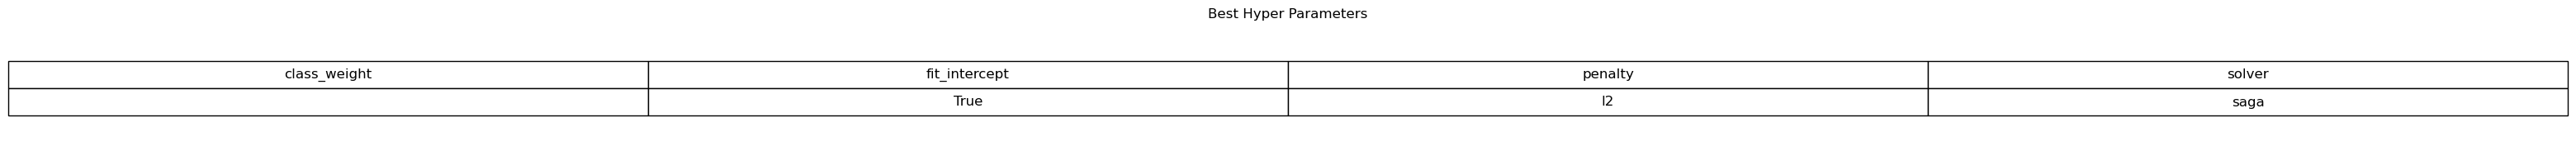

Best Accuracy Score: 0.85


In [9]:
fig, ax = plt.subplots(figsize=(20, 2))
ax.axis('off')

table_data = [str(best_params), str(best_score)]

parameter_names = sorted(list(best_params.keys()))
parameter_values = [best_params[key] for key in parameter_names]

table = ax.table(cellText=[parameter_values], colLabels=parameter_names, cellLoc='center', loc='center')

# Set the table style
table.auto_set_font_size(False)
table.set_fontsize(12)
table.scale(2, 2)

plt.title('Best Hyper Parameters')
plt.show()

print(f'Best Accuracy Score: {best_score}')

In [10]:
df = pd.DataFrame(grid_search.cv_results_)
print(df)

    mean_fit_time  std_fit_time  mean_score_time  std_score_time  \
0        0.173639      0.020632         0.000000        0.000000   
1        0.135602      0.050899         0.000000        0.000000   
2        0.130457      0.003615         0.000000        0.000000   
3        0.089399      0.034275         0.000000        0.000000   
4        0.210189      0.040325         0.000000        0.000000   
..            ...           ...              ...             ...   
75       3.352267      0.098355         0.007747        0.000560   
76     336.317720      7.547244         0.009570        0.001750   
77      30.353485     11.396174         0.002206        0.004412   
78      37.925994      0.622850         0.011945        0.001250   
79      38.797399      1.424593         0.011602        0.002863   

   param_class_weight param_fit_intercept param_penalty     param_solver  \
0                None                True    elasticnet            lbfgs   
1                None          

In [11]:
cs = [0.1, 0.5, 1, 10, 50, 100, 1000]
tr_errs = []
val_errs = []
te_errs = []

for c in cs:
    logistic = LogisticRegression(solver='saga', fit_intercept = True,\
                                  penalty='l2', C=c, random_state=seed, n_jobs=-1)
    logistic.fit(X_tr[:training_amount], y_tr[:training_amount])

    logistic_train_pred = logistic.predict(X_tr)
    logistic_val_pred = logistic.predict(X_val)
    logistic_test_pred = logistic.predict(X_te)

    logistic_train_error = 1 - accuracy_score(y_tr, logistic_train_pred)
    logistic_val_error = 1 - accuracy_score(y_val, logistic_val_pred)
    logistic_test_error = 1 - accuracy_score(y_te, logistic_test_pred)

    tr_errs.append(logistic_train_error)
    val_errs.append(logistic_val_error)
    te_errs.append(logistic_test_error)

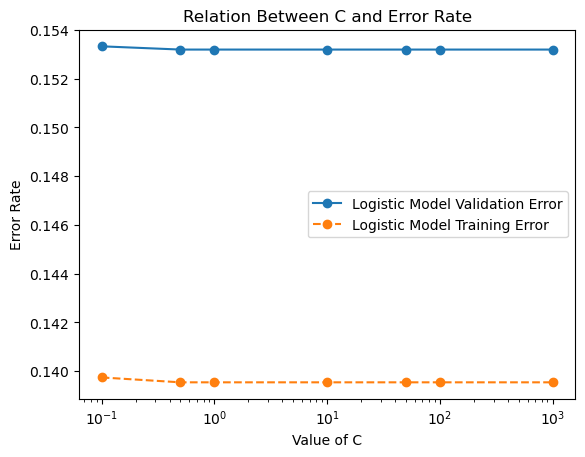

In [12]:
plt.figure()
plt.plot(cs, val_errs, 'o-', label='Logistic Model Validation Error')
plt.plot(cs, tr_errs, 'o--', label='Logistic Model Training Error')

plt.xlabel('Value of C')
plt.ylabel('Error Rate')
plt.xscale('log')
plt.title('Relation Between C and Error Rate')

plt.legend()
plt.show()

In [13]:
print(tr_errs)
print(val_errs)
print(te_errs)

[0.13973333333333338, 0.1395333333333333, 0.1395333333333333, 0.1395333333333333, 0.1395333333333333, 0.1395333333333333, 0.1395333333333333]
[0.15333333333333332, 0.1532, 0.1532, 0.1532, 0.1532, 0.1532, 0.1532]
[0.16549999999999998, 0.1654, 0.1653, 0.1653, 0.1653, 0.1653, 0.1653]


In [15]:
tr_errs = []
te_errs = []

n_tr = [100, 1000, 5000, 10000, 20000, 45000]

for n in n_tr:

    # Get a sub portion of feature vectors
    sub_X_tr = X_tr[:n]
    sub_y_tr = y_tr[:n]

    # LogisticRegression
    logistic = LogisticRegression(solver='saga', fit_intercept = True,\
                                  penalty='l2', C=1, random_state=seed, n_jobs=-1)

    logistic.fit(sub_X_tr, sub_y_tr)

    logistic_train_pred = logistic.predict(X_tr)
    logistic_test_pred = logistic.predict(X_te)

    logistic_train_error = 1 - accuracy_score(y_tr, logistic_train_pred)
    logistic_test_error = 1 - accuracy_score(y_te, logistic_test_pred)

    tr_errs.append(logistic_train_error)
    te_errs.append(logistic_test_error)



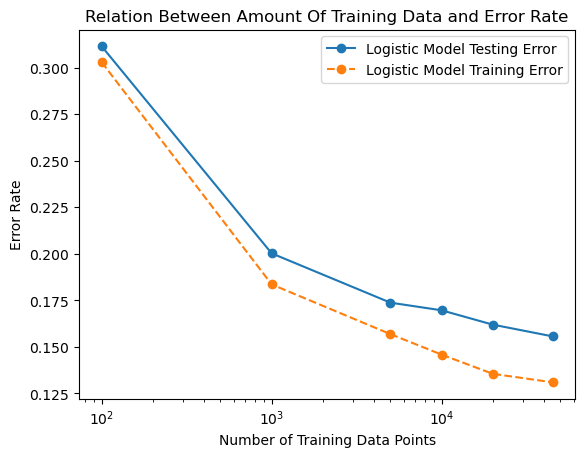

In [16]:
plt.figure()
plt.plot(n_tr, te_errs, 'o-', label='Logistic Model Testing Error')
plt.plot(n_tr, tr_errs, 'o--', label='Logistic Model Training Error')

plt.xlabel('Number of Training Data Points')
plt.ylabel('Error Rate')
plt.xscale('log')
plt.title('Relation Between Amount Of Training Data and Error Rate')

plt.legend()
plt.show()

In [17]:
# model = LogisticRegression(random_state=seed, solver='saga', max_iter=10000)
# model.fit(X_tr, y_tr)

y_tr_pred = logistic.predict(X_tr)
y_val_pred = logistic.predict(X_val)
y_te_pred = logistic.predict(X_te)

acc_tr = accuracy_score(y_tr, y_tr_pred)
acc_val = accuracy_score(y_val, y_val_pred)
acc_te = accuracy_score(y_te, y_te_pred)

print(f"Training Accuracy of Logistic Model: {acc_tr}")
print(f"Validation Accuracy of Logistic Model: {acc_val}")
print(f"Testing Accuracy of Logistic Model: {acc_te}")

Training Accuracy of Logistic Model: 0.8690888888888889
Validation Accuracy of Logistic Model: 0.8544666666666667
Testing Accuracy of Logistic Model: 0.8444


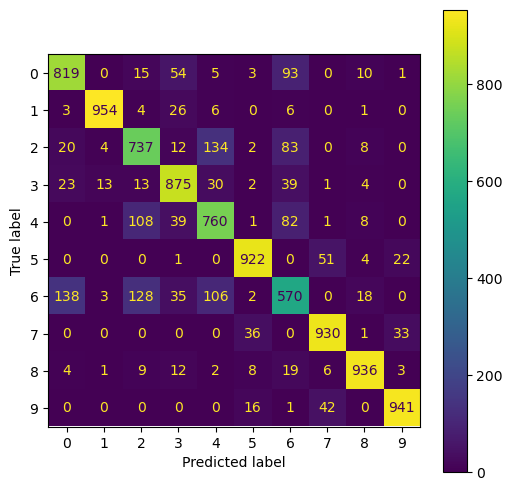

In [18]:
# plot confusion matrix
figure, axes = plt.subplots(figsize=(6, 6))
cm = confusion_matrix(y_te, y_te_pred)
disp = ConfusionMatrixDisplay(confusion_matrix= cm)
disp.plot(ax=axes)

<Axes: >

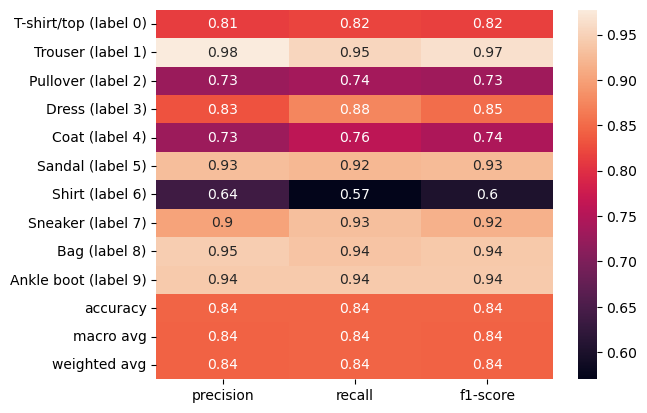

In [19]:
label2desc = {0: 'T-shirt/top (label 0)', 
              1: 'Trouser (label 1)', 
              2: 'Pullover (label 2)', 
              3: 'Dress (label 3)', 
              4: 'Coat (label 4)', 
              5: 'Sandal (label 5)', 
              6: 'Shirt (label 6)', 
              7: 'Sneaker (label 7)',
              8: 'Bag (label 8)',
              9: 'Ankle boot (label 9)'}



report = classification_report(y_te, y_te_pred, target_names = label2desc.values(), output_dict=True)

sns.heatmap(pd.DataFrame(report).iloc[:-1, :].T, annot=True)